In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
# read dataset
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
#  check uniqe
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [6]:
# tedad countries
len(df["Country"].unique())

193

In [72]:
# change the name of status
df["Status"] = df["Status"].replace({"Developing":0,"Developed":1})

In [8]:
df["Status"].value_counts()

Status
0    2426
1     512
Name: count, dtype: int64

In [10]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [73]:
# know the columns and drop some of its
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ',
       'Total expenditure', 'GDP', 'Population',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [74]:
df = df.drop(["Measles ","Adult Mortality","under-five deaths ","Polio","Diphtheria "," HIV/AIDS"," thinness  1-19 years"," thinness 5-9 years"],axis=1)

KeyError: "['Measles ', 'Adult Mortality', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years'] not found in axis"

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8    BMI                             2904 non-null   float64
 9   Total expenditure                2712 non-null   float64
 10  GDP                              2490 non-null   float64
 11  Population                       2286 non-null   float64
 12  Income composition o

In [14]:
df

,Country,Year,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,62,0.01,71.279624,65.0,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,0,59.9,64,0.01,73.523582,62.0,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,0,59.9,66,0.01,73.219243,64.0,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,0,59.5,69,0.01,78.184215,67.0,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,0,59.2,71,0.01,7.097109,68.0,17.2,7.87,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,27,4.36,0.000000,68.0,27.1,7.13,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,0,44.5,26,4.06,0.000000,7.0,26.7,6.52,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,0,44.8,25,4.43,0.000000,73.0,26.3,6.53,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,0,45.3,25,1.72,0.000000,76.0,25.9,6.16,548.587312,12366165.0,0.427,9.8


In [75]:
# find Nan value
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
 BMI                               0
Total expenditure                  0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [76]:
# filling nan value with the balayi clomns
df = df.fillna(method="ffill")

C:\Users\Asus\AppData\Local\Temp\ipykernel_7004\4158956470.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [17]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
 BMI                               0
Total expenditure                  0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
df.describe()

,Year,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000
mean,2007.518720,0.174268,69.195643,30.303948,4.607270,738.251295,75.683799,38.020150,5.905211,7475.593613,1.316870e+07,0.631418,11.935671
std,4.613841,0.379405,9.536654,117.926501,4.044785,1987.914858,28.851806,20.175077,2.484620,13728.461983,5.629984e+07,0.210920,3.340202
min,2000.000000,0.000000,36.300000,0.000000,0.010000,0.000000,1.000000,1.000000,0.370000,1.681350,3.400000e+01,0.000000,0.000000
25%,2004.000000,0.000000,63.025000,0.000000,0.880000,4.685343,66.000000,19.000000,4.260000,456.766527,1.364255e+05,0.494000,10.100000
50%,2008.000000,0.000000,72.000000,3.000000,3.765000,64.912906,89.000000,43.000000,5.710000,1680.834893,1.289898e+06,0.684000,12.300000
75%,2012.000000,0.000000,75.600000,22.000000,7.665000,441.534144,96.000000,56.100000,7.440000,6454.061607,7.394106e+06,0.791000,14.100000
max,2015.000000,1.000000,89.000000,1800.000000,17.870000,19479.911610,99.000000,87.300000,17.600000,119172.741800,1.293859e+09,0.948000,20.700000


In [19]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
train = train.drop("Country",axis=1)
y_train = train["Life expectancy "]
#x_train = train.drop("Life expectancy ",axis=1)
#y_test = test["Life expectancy "]
#x_test = test.drop("Life expectancy ",axis=1)

In [77]:
# zarib hambastegi ke neshan midahad vabasege cloumns ro be "Life exepectancy"
corr_matrix = train.corr()
corr_matrix["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.991509
Hepatitis B                        0.973427
Income composition of resources    0.969082
 BMI                               0.844098
Alcohol                            0.749803
GDP                                0.422525
percentage expenditure             0.386284
Status                             0.369020
Name: Life expectancy , dtype: float64

In [78]:
# normalizing:
from sklearn.preprocessing import normalize
norm = normalize(train)
train = pd.DataFrame(norm,columns=train.columns)
train

,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,GDP,Income composition of resources,Schooling
0,0.000045,0.003622,0.000323,0.120219,0.003893,0.003015,0.992728,0.000037,0.000661
1,0.000000,0.143270,0.005259,0.000000,0.165810,0.056220,0.973754,0.001285,0.024353
2,0.000000,0.099943,0.007992,0.142526,0.161596,0.028279,0.970883,0.000625,0.010363
3,0.000000,0.081341,0.005086,0.057628,0.122510,0.033761,0.986774,0.000584,0.012821
4,0.000000,0.555552,0.002239,0.004570,0.732123,0.151592,0.357026,0.004169,0.069767
...,...,...,...,...,...,...,...,...,...
2051,0.000043,0.003765,0.000299,0.155868,0.003549,0.002943,0.987760,0.000036,0.000641
2052,0.000000,0.101925,0.005770,0.095827,0.149203,0.041525,0.977831,0.000728,0.015999
2053,0.000000,0.098829,0.009723,0.090799,0.108744,0.007516,0.984800,0.000732,0.013433
2054,0.000036,0.002894,0.000337,0.127450,0.003440,0.002064,0.991832,0.000030,0.000558


In [23]:
# remove the clumns with low correlation
train = train.drop(["infant deaths","Population","Year","Total expenditure"],axis=1)
train

,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,GDP,Income composition of resources,Schooling
0,1.847341e-05,0.001478,1.319001e-04,4.905749e-02,0.001589,1.230329e-03,4.050990e-01,1.501888e-05,2.697117e-04
1,0.000000e+00,0.000102,3.742896e-06,0.000000e+00,0.000118,4.001026e-05,6.929941e-04,9.145203e-07,1.733163e-05
2,0.000000e+00,0.000038,3.004886e-06,5.358805e-05,0.000061,1.063267e-05,3.650412e-04,2.351076e-07,3.896446e-06
3,0.000000e+00,0.000036,2.236624e-06,2.534445e-05,0.000054,1.484818e-05,4.339802e-04,2.568672e-07,5.638549e-06
4,0.000000e+00,0.000001,5.287607e-09,1.079023e-08,0.000002,3.579303e-07,8.429868e-07,9.843083e-09,1.647293e-07
...,...,...,...,...,...,...,...,...,...
2051,2.398579e-06,0.000209,1.657418e-05,8.637972e-03,0.000197,1.631034e-04,5.474000e-02,1.981226e-06,3.549897e-05
2052,0.000000e+00,0.000364,2.062956e-05,3.425909e-04,0.000533,1.484557e-04,3.495826e-03,2.602795e-06,5.719722e-05
2053,0.000000e+00,0.000006,6.361903e-07,5.941116e-06,0.000007,4.917918e-07,6.443727e-05,4.792354e-08,8.789471e-07
2054,1.744777e-07,0.000014,1.622643e-06,6.140323e-04,0.000017,9.945232e-06,4.778461e-03,1.467358e-07,2.686957e-06


In [25]:
y_train = train["Life expectancy "]
x_train = train.drop("Life expectancy ",axis=1)

In [33]:
# test dataset
test = test.drop(["infant deaths","Population","Year","Total expenditure"],axis=1)

In [35]:
# drop countries
test = test.drop("Country",axis=1)

In [36]:
# normalizing:
norm = normalize(test)
test = pd.DataFrame(norm,columns=test.columns)
test

,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,GDP,Income composition of resources,Schooling
0,0.000000,0.041622,0.000548,0.069268,0.046874,0.027390,0.995229,0.000359,0.006438
1,0.000087,0.006617,0.001031,0.135625,0.008282,0.005065,0.990689,0.000068,0.001212
2,0.000000,0.012374,0.000830,0.113154,0.001501,0.009539,0.993451,0.000127,0.002268
3,0.000000,0.003074,0.000063,0.014698,0.003922,0.002517,0.999876,0.000033,0.000580
4,0.000000,0.474479,0.013805,0.006232,0.767942,0.131647,0.402070,0.004096,0.076794
...,...,...,...,...,...,...,...,...,...
877,0.000000,0.015309,0.000038,0.042449,0.014580,0.012040,0.998800,0.000141,0.002275
878,0.000278,0.019467,0.001860,0.092538,0.026736,0.015512,0.995029,0.000203,0.003955
879,0.000284,0.024402,0.002792,0.167002,0.026956,0.001958,0.985262,0.000258,0.005873
880,0.000016,0.001346,0.000122,0.189124,0.000692,0.000951,0.981952,0.000015,0.000264


In [ ]:
# remove low corelation
test = test.drop(["infant deaths","Population","Year","Total expenditure"],axis=1)
test

In [38]:
y_test = test["Life expectancy "]
x_test = test.drop("Life expectancy ",axis=1)

In [26]:
# fit model:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
# metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train,y_pred=reg.predict(x_train))

1.8584597029210816e-07

In [39]:
mean_squared_error(y_true=y_test,y_pred=reg.predict(x_test))

0.0024135224135085993

# Hepatit B

## bedoonim developing countries vs developed countries chikar mikonan

In [79]:
developed = df[df["Status"]==1]
developed

,Country,Year,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
112,Australia,2015,1,82.8,1,2.90,0.00000,93.0,66.6,6.25,56554.38760,23789338.0,0.937,20.4
113,Australia,2014,1,82.7,1,9.71,10769.36305,91.0,66.1,9.42,62214.69120,2346694.0,0.936,20.4
114,Australia,2013,1,82.5,1,9.87,11734.85381,91.0,65.5,9.36,67792.33860,23117353.0,0.933,20.3
115,Australia,2012,1,82.3,1,10.03,11714.99858,91.0,65.0,9.36,67677.63477,22728254.0,0.930,20.1
116,Australia,2011,1,82.0,1,10.30,10986.26527,92.0,64.4,9.20,62245.12900,223424.0,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,1,77.5,28,8.48,0.00000,92.0,63.1,15.14,3371.26869,49175848.0,0.791,11.8
2806,United States of America,2003,1,77.2,28,8.40,0.00000,92.0,62.4,15.60,3371.26869,49175848.0,0.791,11.8
2807,United States of America,2002,1,77.0,28,8.33,0.00000,88.0,61.7,14.55,3371.26869,49175848.0,0.791,11.8
2808,United States of America,2001,1,76.9,28,8.25,0.00000,89.0,6.9,13.73,3371.26869,49175848.0,0.791,11.8


In [80]:
developing = df[df["Status"] == 0]
developing

,Country,Year,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,62,0.01,71.279624,65.0,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,0,59.9,64,0.01,73.523582,62.0,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,0,59.9,66,0.01,73.219243,64.0,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,0,59.5,69,0.01,78.184215,67.0,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,0,59.2,71,0.01,7.097109,68.0,17.2,7.87,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,27,4.36,0.000000,68.0,27.1,7.13,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,0,44.5,26,4.06,0.000000,7.0,26.7,6.52,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,0,44.8,25,4.43,0.000000,73.0,26.3,6.53,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,0,45.3,25,1.72,0.000000,76.0,25.9,6.16,548.587312,12366165.0,0.427,9.8


In [81]:
developed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 112 to 2809
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          512 non-null    object 
 1   Year                             512 non-null    int64  
 2   Status                           512 non-null    int64  
 3   Life expectancy                  512 non-null    float64
 4   infant deaths                    512 non-null    int64  
 5   Alcohol                          512 non-null    float64
 6   percentage expenditure           512 non-null    float64
 7   Hepatitis B                      512 non-null    float64
 8    BMI                             512 non-null    float64
 9   Total expenditure                512 non-null    float64
 10  GDP                              512 non-null    float64
 11  Population                       512 non-null    float64
 12  Income composition of re

In [82]:
developing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2426 non-null   object 
 1   Year                             2426 non-null   int64  
 2   Status                           2426 non-null   int64  
 3   Life expectancy                  2426 non-null   float64
 4   infant deaths                    2426 non-null   int64  
 5   Alcohol                          2426 non-null   float64
 6   percentage expenditure           2426 non-null   float64
 7   Hepatitis B                      2426 non-null   float64
 8    BMI                             2426 non-null   float64
 9   Total expenditure                2426 non-null   float64
 10  GDP                              2426 non-null   float64
 11  Population                       2426 non-null   float64
 12  Income composition of res

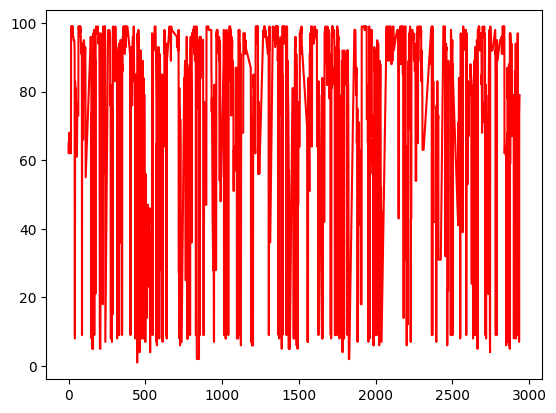

In [83]:
plt.plot(developing["Hepatitis B"],c="red")
#plt.plot(developed["Hepatitis B"][:10],c="blue")

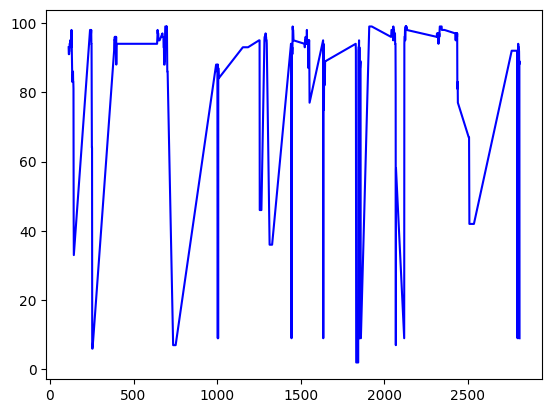

In [84]:
plt.plot(developed["Hepatitis B"],c="blue")

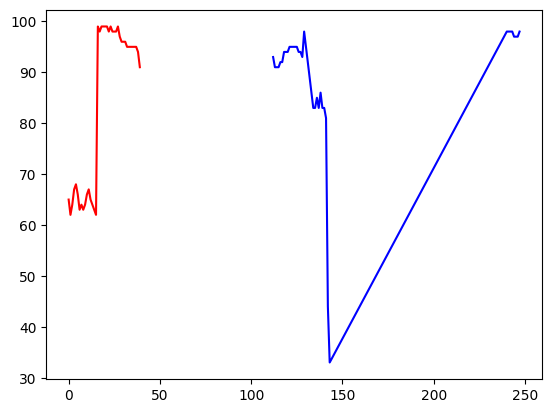

In [85]:
# in plot neshan dahandeh mizan vaxsinasion darbarabare Hepatit ast
plt.plot(developing["Hepatitis B"][:40],c="red")
plt.plot(developed["Hepatitis B"][:40],c="blue")

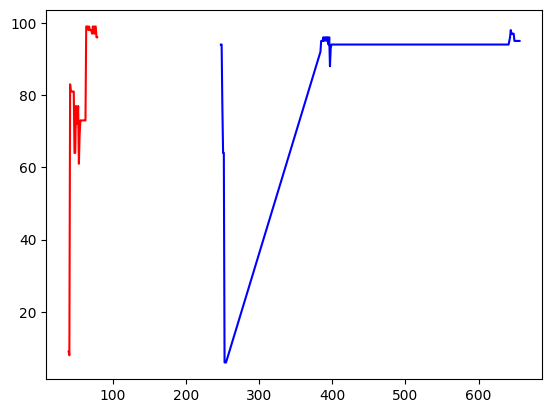

In [86]:
plt.plot(developing["Hepatitis B"][40:80],c="red")
plt.plot(developed["Hepatitis B"][40:80],c="blue")

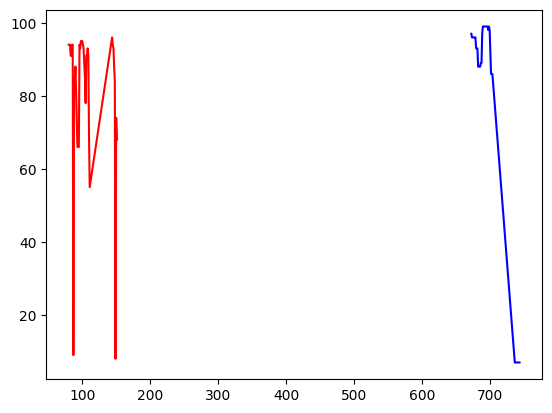

In [87]:
plt.plot(developing["Hepatitis B"][80:120],c="red")
plt.plot(developed["Hepatitis B"][80:120],c="blue")

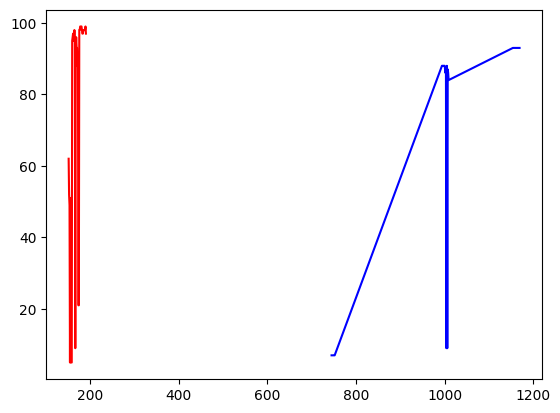

In [88]:
plt.plot(developing["Hepatitis B"][120:160],c="red")
plt.plot(developed["Hepatitis B"][120:160],c="blue")